Fetching Gold Prices...


Failed to get ticker 'GC=F' reason: HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)')))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GC=F']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
Failed to get ticker 'INDA' reason: HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)')))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['INDA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
Failed to get ticker '^TNX' reason: HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max 

Gold data fetched successfully!

Fetching MSCI India ETF Prices...
MSCI India ETF data fetched successfully!

Fetching Bond Yields...




1 Failed download:
['^TNX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Bond Yields fetched successfully!


Combined Data:
Empty DataFrame
Columns: [GC=F, INDA, ^TNX]
Index: []


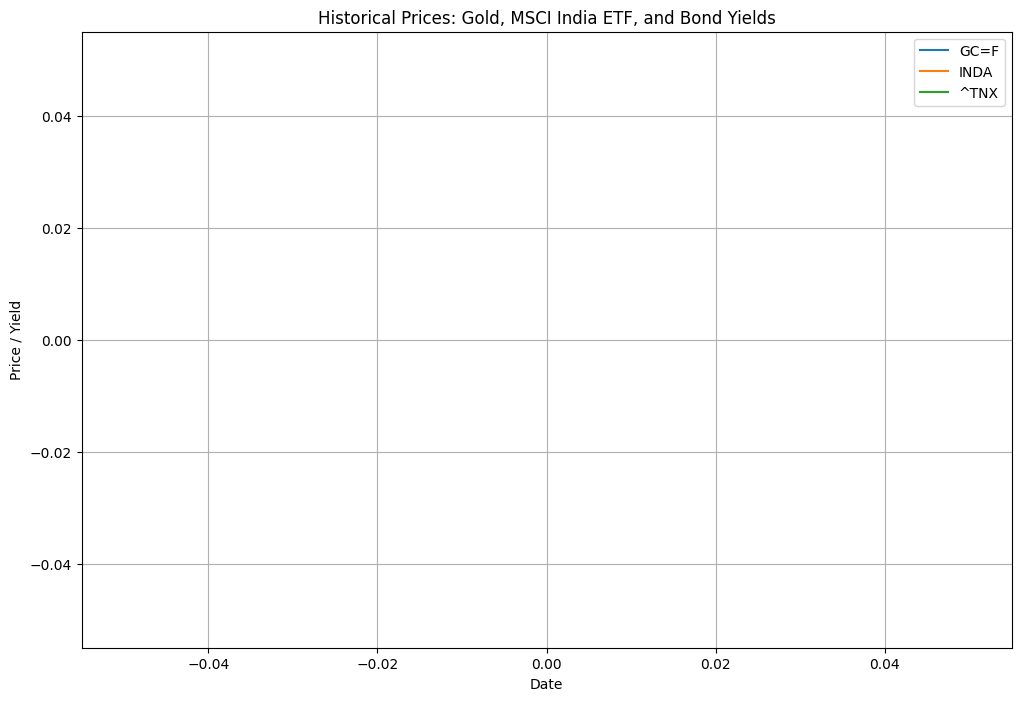

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Function to get gold historical prices
def get_gold_prices(start_date, end_date):
    print("Fetching Gold Prices...")
    gold_ticker = 'GC=F'  # COMEX Gold Futures
    gold_data = yf.download(gold_ticker, start=start_date, end=end_date)
    gold_data = gold_data['Adj Close']
    gold_data.name = 'Gold Price'
    print("Gold data fetched successfully!\n")
    return gold_data

# Function to get MSCI India ETF historical prices
def get_msci_india_etf(start_date, end_date):
    print("Fetching MSCI India ETF Prices...")
    msci_india_ticker = 'INDA'  # iShares MSCI India ETF (Example)
    msci_india_data = yf.download(msci_india_ticker, start=start_date, end=end_date)
    msci_india_data = msci_india_data['Adj Close']
    msci_india_data.name = 'MSCI India ETF'
    print("MSCI India ETF data fetched successfully!\n")
    return msci_india_data

# Function to get historical bond yields (e.g., US 10-Year Treasury Bond)
def get_bond_yields(start_date, end_date):
    print("Fetching Bond Yields...")
    bond_yield_ticker = '^TNX'  # US 10-Year Treasury Yield Index
    bond_yield_data = yf.download(bond_yield_ticker, start=start_date, end=end_date)
    bond_yield_data = bond_yield_data['Adj Close']
    bond_yield_data.name = 'US 10-Year Treasury Yield'
    print("Bond Yields fetched successfully!\n")
    return bond_yield_data

# Main function to fetch and visualize data
def main():
    start_date = '2020-01-01'
    end_date = datetime.now().strftime('%Y-%m-%d')

    # Fetch data
    gold_prices = get_gold_prices(start_date, end_date)
    msci_india_prices = get_msci_india_etf(start_date, end_date)
    bond_yields = get_bond_yields(start_date, end_date)

    # Combine data into a single DataFrame
    combined_data = pd.concat([gold_prices, msci_india_prices, bond_yields], axis=1)
    print("\nCombined Data:")
    print(combined_data.tail())

    # Plot the data
    plt.figure(figsize=(12, 8))
    plt.plot(combined_data, label=combined_data.columns)
    plt.title('Historical Prices: Gold, MSCI India ETF, and Bond Yields')
    plt.xlabel('Date')
    plt.ylabel('Price / Yield')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
